# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
df = pd.read_csv('./data/air_cleaned.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51663 entries, 0 to 51662
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                50860 non-null  object 
 1   Investigation.Type      51663 non-null  object 
 2   Accident.Number         51663 non-null  object 
 3   Event.Date              51663 non-null  object 
 4   Location                51652 non-null  object 
 5   Country                 51544 non-null  object 
 6   Latitude                20373 non-null  object 
 7   Longitude               19567 non-null  object 
 8   Airport.Code            31212 non-null  object 
 9   Airport.Name            32613 non-null  object 
 10  Injury.Severity         50860 non-null  object 
 11  Aircraft.damage         50860 non-null  object 
 12  Aircraft.Category       50860 non-null  object 
 13  Registration.Number     50831 non-null  object 
 14  Make                    50860 non-null

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

**Create Sub-DataFrame for Loaded DataFrame**

In [3]:
df_sub = df[['make_model', 'Make', 'Model', 'Aircraft.damage', 'is_destroyed', 'ser_inj_rate', 'N_passenger']]

**Separate Small & Large Planes**

In [4]:
sm_planes = df_sub[df_sub['N_passenger'] <= 20]
lrg_planes = df_sub[df_sub['N_passenger'] > 20]

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 10 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [5]:
safest_sm_makes = sm_planes.groupby('Make').mean()['ser_inj_rate'].sort_values().nsmallest(10)

safest_lrg_makes = lrg_planes.groupby('Make').mean()['ser_inj_rate'].sort_values().nsmallest(10)

**Plot Injury Risk Profile by 'Make'**

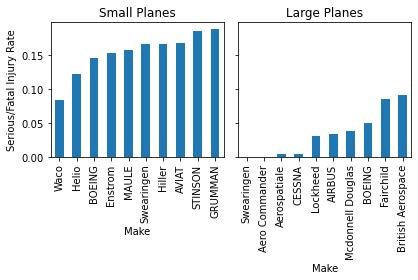

In [6]:
fig, ax = plt.subplots(1, 2, sharey=True)
safest_sm_makes.plot.bar(ax=ax[0])
ax[0].set_title('Small Planes')
safest_lrg_makes.plot.bar(ax=ax[1])
ax[1].set_title('Large Planes')
ax[0].set_ylabel('Serious/Fatal Injury Rate')
plt.tight_layout()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

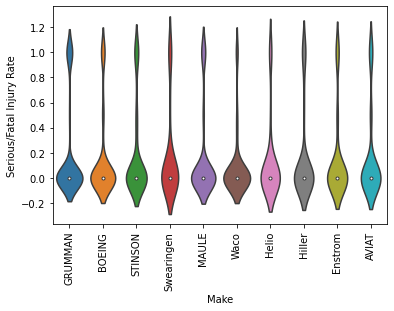

In [7]:
safest_sm_makes_selected = sm_planes[sm_planes['Make'].isin(safest_sm_makes.index)] # filter sm df by make with lowest inj rate

fig, ax = plt.subplots()
sns.violinplot(x = 'Make', y = 'ser_inj_rate', data=safest_sm_makes_selected, ax=ax)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Serious/Fatal Injury Rate');

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

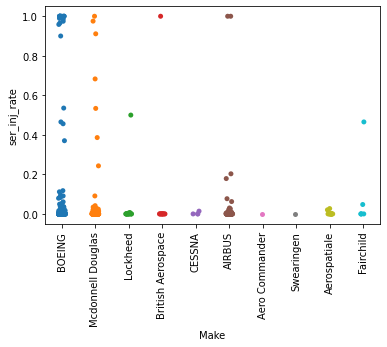

In [8]:
safest_lrg_makes_selected = lrg_planes[lrg_planes['Make'].isin(safest_lrg_makes.index)]

fig, ax = plt.subplots()
sns.stripplot(x = 'Make', y = 'ser_inj_rate', data=safest_lrg_makes_selected, ax=ax)
ax.tick_params(axis='x', rotation=90)

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

**Lowest 15 Rate of Destruction (Small)**

In [9]:
sm_planes.groupby('Make').mean()['is_destroyed'].sort_values().nsmallest(15)

Make
BELLANCA                    0.022727
DEHAVILLAND                 0.029851
DIAMOND AIRCRAFT IND INC    0.033898
AVIAT                       0.057592
CHAMPION                    0.073529
AERO COMMANDER              0.074074
Waco                        0.088235
MAULE                       0.092827
LUSCOMBE                    0.097264
BOEING                      0.105651
TAYLORCRAFT                 0.109272
STINSON                     0.113960
Burkhart Grob               0.125000
ERCOUPE                     0.129870
AERONCA                     0.143541
Name: is_destroyed, dtype: float64

**Lowest 15 Rate of Destruction (Large)**

In [10]:
lrg_planes.groupby('Make').mean()['is_destroyed'].sort_values().nsmallest(15)

Make
Swearingen           0.000000
Aero Commander       0.000000
Aerospatiale         0.000000
AIRBUS               0.037975
BOEING               0.057416
Mcdonnell Douglas    0.058824
British Aerospace    0.090909
EMBRAER              0.097561
Douglas              0.102564
Lockheed             0.117647
De Havilland         0.166667
CESSNA               0.250000
Fairchild            0.333333
BEECH                0.444444
Bell                 1.000000
Name: is_destroyed, dtype: float64

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

For small planes, recommended makes are Waco, Boeing, Stinson, and Maule due to them having both low rates of injury and destruction.

For large planes, recommended makes are Swearingen, Airbus, Boeing, Lockheed, and Cessna for also having both low rates of injury and destruction.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

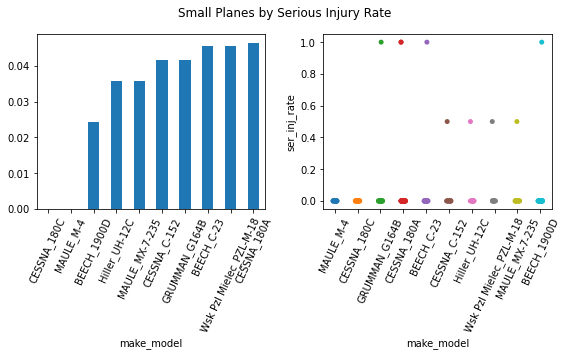

In [17]:
small_plane_counts = sm_planes['make_model'].value_counts() # get value counts to see distribution


small_plane_names = small_plane_counts[small_plane_counts > 10].index # filter to only include higher than 10 counts
fltr_small_plane_names = sm_planes[sm_planes['make_model'].isin(small_plane_names)] # make var to store filtered df

lowest10smallplanenames = fltr_small_plane_names.groupby('make_model').mean()['ser_inj_rate'].sort_values().nsmallest(10).index
lowest10smallplanes_df = sm_planes[sm_planes['make_model'].isin(lowest10smallplanenames)]

fig, ax = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle('Small Planes by Serious Injury Rate')
lowest10smallplanes_df.groupby('make_model').mean()['ser_inj_rate'].sort_values().plot.bar(ax=ax[0])
sns.stripplot(x = 'make_model', y = 'ser_inj_rate', data = lowest10smallplanes_df, ax = ax[1])
ax[0].tick_params(axis='x', rotation=65)
ax[1].tick_params(axis='x', rotation=65)
plt.tight_layout()

**Larger planes**

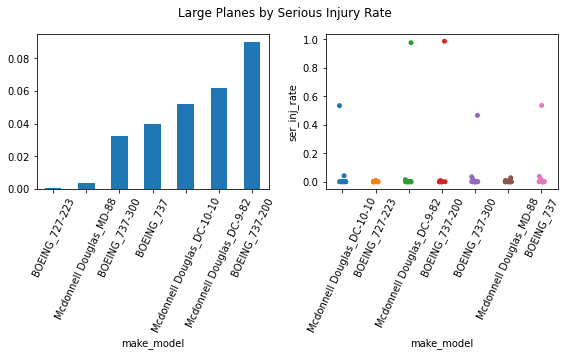

In [18]:
large_plane_counts = lrg_planes['make_model'].value_counts() # get value counts to see distribution


large_plane_names = large_plane_counts[large_plane_counts > 10].index # filter to only include higher than 10 counts
fltr_large_plane_name = lrg_planes[lrg_planes['make_model'].isin(large_plane_names)] # make var to store filtered df

fig, ax = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle('Large Planes by Serious Injury Rate')
fltr_large_plane_name.groupby('make_model').mean()['ser_inj_rate'].sort_values().plot.bar(ax = ax[0])
sns.stripplot(x = 'make_model', y = 'ser_inj_rate', data = fltr_large_plane_name, ax = ax[1])
ax[0].tick_params(axis='x', rotation=65)
ax[1].tick_params(axis='x', rotation=65)
plt.tight_layout()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.